# Getting the optimal local Fourier approximation for MV-SDE

add description here

### Initialising libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### We introduce the class to store the McKean-Vlasov SDE of Kuramoto's type.

In [2]:
def simulate_dW(N,T):
    return np.random.normal(size = N, scale = np.sqrt(T/N[1]))

In [171]:
class SDE_Kuramoto_MV ():
    
    #### Check the correct passing of the arguments
    
    def __init__(self, x_0 = 0, sigma = 1, dW_t = simulate_dW((100,100),1),
                 T = 1, n_discr = 100, n_part = 100):
        self.x_0 = np.random.normal(size = n_part, scale = 0.2)
        self.sigma = sigma
        self.T = T
        self.n_discr = n_discr
        self.n_part = n_part
        self.dt = self.T / self.n_discr
        self.dW_t = dW_t
        self.x = self.get_path()
        
    #### Simulates the path according to Euler algorithm    
    def get_path(self):
        x = np.zeros((self.n_part,self.n_discr))
        

        sum_sin = 0
        sum_cos = 0
        
        for j in range(self.n_part):
            x[j][0] = self.x_0[j]
            sum_sin += np.sin(x[j][0])
            sum_cos += np.cos(x[j][0])
        aver_sin = sum_sin / self.n_part
        aver_cos = sum_cos / self.n_part
        
        for i in range(1,self.n_discr):
            for j in range(self.n_part):
                x[j][i] = x[j][i - 1] + (np.cos(x[j][i - 1]) * aver_sin 
                                      - np.sin(x[j][i - 1]) * aver_cos) * self.dt 
                + self.sigma * self.dW_t[j][i - 1]

                sum_sin += np.sin(x[j][i])
                sum_cos += np.cos(x[j][i])
            aver_sin = sum_sin / self.n_part
            aver_cos = sum_cos / self.n_part
            sum_sin = 0
            sum_cos = 0
        return x
    
    #### Plots the path
    def plot_path(self):
        t = np.linspace(0, self.T, self.n_discr)
        
        fig, ax = plt.subplots(1,1,figsize=(15, 10), tight_layout=True)

        ax.set_title(r"Dynamics of the SDE", fontsize = 15)
        ax.set_xlabel(r'$t$',fontsize = 15)
        ax.set_ylabel(r'$X_t$',fontsize = 15)
        ax.tick_params(axis='both', which='major', labelsize = 20)
        ax.tick_params(axis='both', which='minor', labelsize = 20)
        for i in range(self.n_part):
            ax.plot(t, self.x[i][:])
        #ax.plot(t,[0]*t.shape[0],label = 'asymptote')
        plt.show()

        #ksi = self.get_path_for_gradient_SDE()

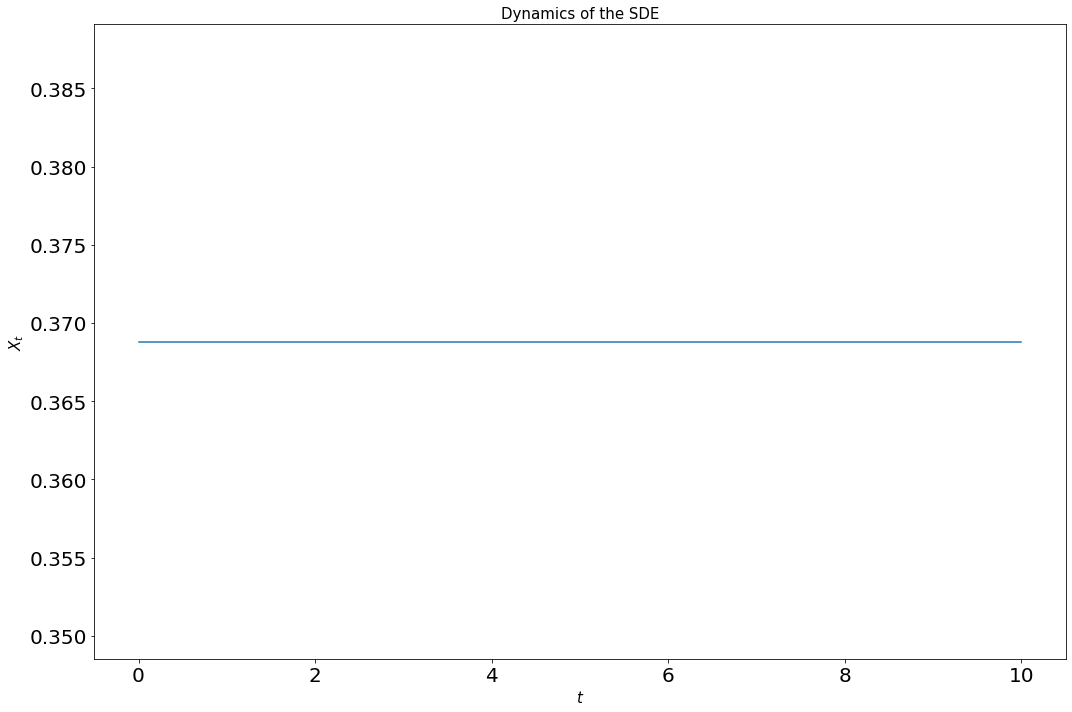

In [178]:
# Discretisation step to render the SDE and Gamma

# Initialise the number of Euler discretisation steps and time horizon
n_discr = 1000
T = 10
dt = T / n_discr

# Initialise the number of particles
n_part = 1

# Initialise the starting value and diffusion constant
x_0 = 1
sigma = 1

# Get the Wiener increments
dW_t = simulate_dW((n_part,n_discr),T)


# Initialise the class and render the dynamics
X = SDE_Kuramoto_MV(x_0, sigma, dW_t, T, n_discr, n_part)
X.plot_path()

### We introduce a class to store the approximation of Kuramoto MV-SDE's and perform the respective updates

In [ ]:
class SDE_Kuramoto_appr ():
    
    ### Check the correct passing of the arguments
    
    def __init__(self, x_0 = 0, b = np.identity, sigma = 1, 
                 gamma = np.random.uniform(low = -0.1, high = 0.1, size = (2,100)), 
                 dW_t = simulate_dW((1,100),1),  T = 1, n_discr = 100):
        self.x_0 = x_0
        self.b = b
        self.sigma = sigma
        self.T = T
        self.n_discr = n_discr
        self.dt = self.T / self.n_discr
        self.gamma = gamma
        self.dW_t = dW_t
        self.x = self.get_path()
        self.ksi = self.get_path_for_gradient_SDE()
        
        
    #### Simulates the path according to Euler algorithm    
    def get_path(self):
        x = np.zeros(self.n_discr)
        x[0] = self.x_0 
        for i in range(1,self.n_discr):
            x[i] = x[i - 1] + (gamma[0][i - 1] * np.sin(x[i - 1]) - 
                               gamma[1][i - 1] * np.cos(x[i - 1])) * self.dt + sigma * self.dW_t[i - 1]
            
        return x

    def get_path_for_gradient_SDE(self):
        ksi = np.zeros((2,self.n_discr))

        for i in range(1,self.n_discr):
            ksi[0][i] = ksi[0][i - 1] + (np.sin(self.x[i - 1]) + 
                                   gamma[0][i - 1] * np.cos(self.x[i - 1]) * ksi[0][i - 1] - 
                                   gamma[1][i - 1] * np.sin(self.x[i - 1]) * ksi[0][i - 1]) * self.dt + sigma * self.dW_t[i - 1]
            ksi[1][i] = ksi[1][i - 1] + (np.cos(self.x[i - 1]) + 
                                   gamma[0][i - 1] * np.cos(self.x[i - 1]) * ksi[1][i - 1] - 
                                   gamma[1][i - 1] * np.sin(self.x[i - 1]) * ksi[1][i - 1]) * self.dt + sigma * self.dW_t[i - 1]
        
        return ksi
    
    #### Plots the path
    def plot_path(self):
        t = np.linspace(0, self.T, self.n_discr)
        
        fig, ax = plt.subplots(1,1,figsize=(15, 10), tight_layout=True)

        ax.set_title(r"Dynamics of the SDE", fontsize = 15)
        ax.set_xlabel(r'$t$',fontsize=15)
        ax.set_ylabel(r'$X_t$',fontsize=15)
        ax.tick_params(axis='both', which='major', labelsize = 20)
        ax.tick_params(axis='both', which='minor', labelsize = 20)
        ax.plot(t, self.x)
        
        plt.show()
        
    def plot_grad_path(self):
        t = np.linspace(0, self.T, self.n_discr)
        
        fig, ax = plt.subplots(1,1,figsize=(15, 10), tight_layout=True)

        ax.set_title(r"Dynamics of the gradient SDE", fontsize = 15)
        ax.set_xlabel(r'$t$',fontsize=15)
        ax.set_ylabel(r'$\xi_t$',fontsize=15)
        ax.tick_params(axis='both', which='major', labelsize = 20)
        ax.tick_params(axis='both', which='minor', labelsize = 20)
        ax.plot(t, self.ksi[0])
        
        plt.show()
        
    def update_gamma(self, gamma):
        self.gamma = gamma
        x = self.get_path()
        #ksi = self.get_path_for_gradient_SDE()

In [ ]:
# Discretisation step to render the SDE and Gamma

# Initialisse the number of Euler discretisation steps and time horizon

n_discr = 1000
T = 1
dt = T / n_discr


# Initialise the starting value, drift function, starting guess for gamma and diffusion constant
x_0 = 1
b = np.sin
gamma = np.random.uniform(low = - 0.1, high = 0.1, size = (2,n_discr))
sigma = 1

# Get the Wiener increments
dW_t = simulate_dW((n_discr,1),T)

# Initialise the class and render the dynamics
X = SDE_Kuramoto_appr(x_0, b, sigma, gamma, dW_t, T, n_discr)
X.plot_path()
#X.plot_grad_path()

dW_t = simulate_dW((100,n_discr),T)

X = SDE_Kuramoto_MV(x_0, b, sigma, dW_t, T, n_discr, n_part = 100)
X.plot_path()

## Algorithm

In [ ]:
eta = 0.1
N_iter = 100

# Initialise the number of Euler discretisation steps and time horizon

n_discr = 1000
T = 100
dt = T / n_discr

# Initialise the starting value, drift function, starting guess for gamma and diffusion constant
x_0 = 1
b = np.sin
sigma = 1

gamma = np.random.uniform(low = - 0.1, high = 0.1, size = (2,n_discr))

err = np.inf
eps = 0
i = 0


while (err > eps) and (i < N_iter):
    dW_t_1 = simulate_dW(n_discr,T)
    dW_t_2 = simulate_dW(n_discr,T)
    X_1 = SDE_Kuramoto_appr(x_0, b, sigma, gamma, dW_t_1, T, n_discr)
    X_2 = SDE_Kuramoto_appr(x_0, b, sigma, gamma, dW_t_2, T, n_discr)
    grad = np.zeros((2,n_discr))
    grad[0] = np.sin(X.x)
    grad[1] = -np.cos(X.x)
    
    gamma = gamma - grad 
    
    i += 1